# Úkol č. 1 - předzpracování dat a binární klasifikace

  * **Deadline je do 3. 11. 2022, 23:59:59**, pokud odevzdáte úkol do 10. 11. 2022, 23:59:59, budete penalizování -4 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s příznaky, které jsou různých typů.
  * Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru **data.csv** a data na vyhodnocení v souboru **evaluation.csv**.

#### Seznam příznaků:
* survived - zda přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **12 bodů**:
  * Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.
  * V notebooku načtěte data ze souboru **data.csv**. Vhodným způsobem si je rozdělte na podmnožiny potřebné k trénování a evaluaci modelu (optimálně tedy trénovací, validační a testovací).
  * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
  * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména. Některé příznaky můžete také úplně zahodit. Pro průzkum dat využívejte vizualizace.
  * Nějakým způsobem se vypořádejte s chybějícími hodnotami.
  * Následně si vyberte vhodný klasifikační model z přednášek. Najděte vhodné hyperparametry a určete jeho přesnost (accuracy) na trénovací množině. Také určete jeho přesnost na testovací množině.
  * Načtěte vyhodnocovací data ze souboru **evaluation.csv**. Napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte **results.csv** soubor, ve kterém tyto predikce uložíte do dvou sloupců: ID, predikce přežití. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
  * Ukázka prvních řádků souboru *results.csv*:
  
```
ID,survived
1000,0
1001,1
...
```

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 16 bodů):
  * (až +4 body) Aplikujte všechny klasifikační modely z přednášek a určete (na základě přesnosti na validační množině), který je nejlepší. Přesnost tohoto nejlepšího modelu odhadněte na testovací množině. K predikcím na vyhodnocovacích datech využijte tento model.
  * (až +4 body) Zaměřte se na optimální předzpracování dat. Zabývejte se tím, jak nejlépe zpracovat a reprezentovat kategoriální příznaky. Také zkuste data normalizovat. Zaměřte se na vliv těchto kroků na přesnost predikce výsledného modelu. K predikcím na vyhodnocovacích datech využijte ten přístup, který Vám vyjde jako nejlepší.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.
  * Vytvořte i csv soubor s predikcemi a uložte ho v rámci projektu (`results.csv`, vedle ipython notebooku).
  * Opravující Vám ve výjimečných případech může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale stěžejní a má hlavní vliv na hodnocení.

# MOJE ŘEŠENÍ:

## Importování potřebných balíčků

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns # klasifikace
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as ticker # Mřížka grafů

## Načtení dat

In [2]:
df = pd.read_csv('data.csv')
eval_data=pd.read_csv('evaluation.csv')

## Průzkum dat + vizualizace

#### Základní statistiky

In [3]:
print("Rozměry datasetu:", df.shape)
display(df.describe())
df.info()

Rozměry datasetu: (1000, 13)


,ID,survived,pclass,age,sibsp,parch,fare
count,1000.000000,1000.000000,1000.000000,797.000000,1000.000000,1000.000000,999.000000
mean,499.500000,0.391000,2.293000,30.006692,0.499000,0.384000,33.418514
std,288.819436,0.488219,0.840153,14.240416,1.020314,0.873675,53.115334
min,0.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000
25%,249.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,499.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,749.250000,1.000000,3.000000,38.500000,1.000000,0.000000,31.275000
max,999.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        797 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      222 non-null    object 
 11  embarked   999 non-null    object 
 12  home.dest  573 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


#### Vizualizace predikovaného příznaku "survived"

Text(0.5, 1.0, 'Počty přeživších a nepřeživších')

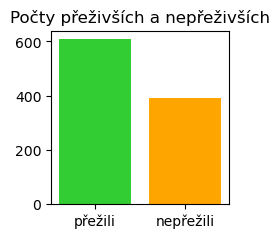

In [4]:
tmp = df["survived"].value_counts()
fig = plt.figure(figsize=(4,4), facecolor='white', constrained_layout=True)
ax = fig.add_subplot(2, 2, 1)
ax.bar(["přežili", "nepřežili"], tmp.values, color=['limegreen', "orange"])
locator1 = ticker.FixedLocator([0, 1])
ax.xaxis.set_major_locator(locator1)
ax.set_title("Počty přeživších a nepřeživších")

#### Graf souvislosti mezi pclass na survived ukazuje, že v první třídě jako jediné převyšuje počet přeživších počet mrtvých. Většina mrtvých byli ze třetí třídy.

Text(0.5, 1.0, 'Počty přeživších a nepřeživších v různých třídách')

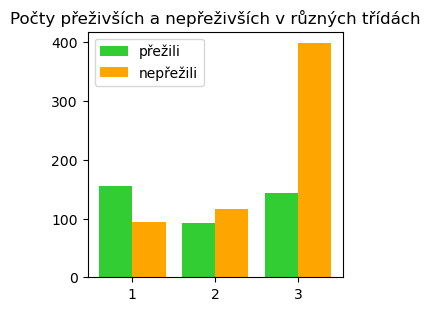

In [5]:
# vizualizace pclass
tmp1 = df[df["survived"] == 1]["pclass"].value_counts()
tmp2 = df[df["survived"] == 0]["pclass"].value_counts()
fig = plt.figure(figsize=(3, 3), facecolor='white', constrained_layout=True)
ax = fig.add_subplot(1, 1, 1)
ax.bar(tmp1.index-0.2, tmp1.values, width=0.4, color='limegreen')
ax.bar(tmp2.index+0.2, tmp2.values, width=0.4, color="orange")
ax.legend(['přežili', 'nepřežili'])
locator1 = ticker.FixedLocator([1, 2, 3])
ax.xaxis.set_major_locator(locator1)
ax.set_title("Počty přeživších a nepřeživších v různých třídách")

#### Na grafu závislosti embarked a survived vidíme, že v poměru přeživších a mrtvých je pouze u Cherbourgu vyšší počet přeživších. U Southamptonu je dokonce skoro dvojnásobek mrtvých oproti přeživším.

Text(0.5, 1.0, 'Rozdělení přeživších a nepřeživších podle místa nalodění')

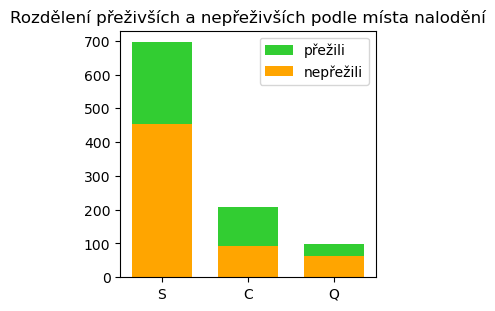

In [6]:
# Vizualizace embarked
tmp1 = df[df["survived"] == 1]["embarked"].dropna().value_counts()
tmp2 = df[df["survived"] == 0]["embarked"].dropna().value_counts()
fig = plt.figure(figsize=(3,3), facecolor='white', constrained_layout=True)
ax = fig.add_subplot(1, 1, 1)
ax.bar(["S", "C", "Q"], tmp1.values+tmp2.values, width=0.7, color='limegreen')
ax.bar(["S", "C", "Q"], tmp2.values, width=0.7, color='orange')
ax.legend(['přežili', 'nepřežili'])
ax.set_title("Rozdělení přeživších a nepřeživších podle místa nalodění")

#### Poměr pasažérů různých tříd v různých místech nalodění

Důvodem, proč u Cherbourgu jako jediného převišuje počet přeživších počet mrtvých může být to, že je tam velký poměr pasažérů z první třídy

Text(0.5, 1.0, 'Poměr pasažérů různých tříd v různých místech nalodění')

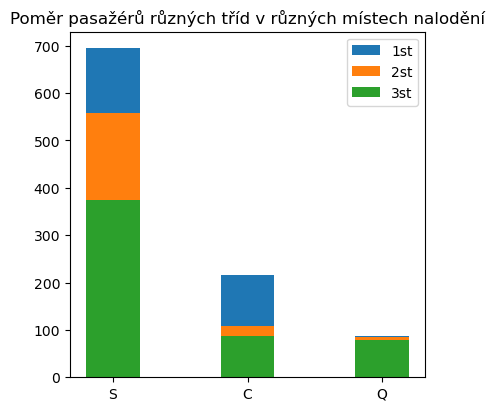

In [7]:
tmp1 = df[df["pclass"] == 1]["embarked"].dropna().value_counts()
tmp2 = df[df["pclass"] == 2]["embarked"].dropna().value_counts()
tmp3 = df[df["pclass"] == 3]["embarked"].dropna().value_counts()
fig = plt.figure(figsize=(4,4), facecolor='white', constrained_layout=True)
ax = fig.add_subplot(1, 1, 1)
ax.bar(tmp1.index, tmp1.values+tmp2.values+tmp3.values, width=0.4)
ax.bar(tmp1.index, tmp2.values+tmp3.values, width=0.4)
ax.bar(tmp1.index, tmp3.values, width=0.4)
ax.legend(["1st", "2st", "3st" ])
ax.set_title("Poměr pasažérů různých tříd v různých místech nalodění")

## Konverze příznaků do vhodné podoby pro trénování ve vybraném modelu

#### Příznak `pclass`
nabývá pouze hodnot `1`, `2`, `3` v `Int64`, proto ho můžeme ponechat, tak jak je.

In [8]:
print("pclass:", df.pclass.dtype, df.pclass.sort_values().unique()) # zobrazení výsledku

pclass: int64 [1 2 3]


#### Příznak `sibsp`
nabývá pouze hodnot `0`, `1`, `2`, `3`, `4`, `5`, `8` v `Int64`, proto ho můžeme ponechat, tak jak je.

In [9]:
print("sibsp:", df.sibsp.dtype, df.sibsp.sort_values().unique()) # zobrazení výsledku

sibsp: int64 [0 1 2 3 4 5 8]


#### Příznak `parch`
nabývá pouze hodnot `0`, `1`, `2`, `3`, `4`, `5`, `9` v `Int64`, proto ho můžeme ponechat, tak jak je.

In [10]:
print("parch:", df.parch.dtype, df.parch.sort_values().unique()) # zobrazení výsledku

parch: int64 [0 1 2 3 4 5 9]


#### Příznak `age`
typu `Float64` nabývá hodnot v rozsahu `0-76` a také obsahuje `NaN` hodnoty.
`Sci-kit` implementace stromu pracuje s `Float32` typem, proto na něj příznak převedeme.

In [11]:
df["age"] = df["age"].astype('float32')
print("age:", df.age.dtype, min(df.age.sort_values().unique()), "-", max(df.age.sort_values().unique())) # zobrazení výsledku

age: float32 0.1667 - 76.0


#### Příznak `fare`
typu `Float64` nabývá hodnot v rozsahu `0-512` a také obsahuje `NaN` hodnoty.
`Sci-kit` implementace stromu pracuje s `Float32` typem, proto na něj příznak převedeme.

In [12]:
df["fare"] = df["fare"].astype('float32')
print("fare:", df.fare.dtype, min(df.fare.sort_values().unique()), "-", max(df.fare.sort_values().unique())) # zobrazení výsledku

fare: float32 0.0 - 512.3292


#### Příznak `sex`
je binární parametr, nabývá pouze hodnot `male` a `female`, proto můžeme hodnoty nahradit hodnotami `0` a `1` v `Int64`.

In [13]:
def my_f1(x:str):
    if type(x) != str: # ošetření, pokud buňku spustím víckrát
        return x
    if x == 'male':
        return 0
    return 1

df.sex = df.sex.apply(lambda x: my_f1(x)) # konverze slovní reprezentace příznaku na číselnou
print("sex:", df.sex.dtype, df.sex.sort_values().unique()) # zobrazení výsledku

sex: int64 [0 1]


#### Příznak `embarked`
nabývá hodnot `C`, `Q`, `S` a `NaN` hodnoty. Tyto hodnoty lze zakódovat `číslami` a to `bez` zavedení `uspořádání`, protože pro ně takové přirozené neexistuje.

In [14]:
df.embarked = df.embarked.astype('category').cat.codes
print("embarked:", df.embarked.dtype, df.embarked.sort_values().unique()) # zobrazení výsledku

embarked: int8 [-1  0  1  2]


#### Příznak `home.dest`
obsahuje `314` `unikátních` a `427` `chybějících` hodnot, a proto není zajímavý pro náš model.

In [15]:
print("home.dest unikátních:", df["home.dest"].nunique())
print("home.dest duplicit:", df["home.dest"].dropna().duplicated().sum())
print("home.dest nulových:", int(df["home.dest"].isnull().sum() / df.ID.count() * 100), "%")
# odebrání sloupce
df.drop("home.dest", axis=1, inplace=True)

home.dest unikátních: 314
home.dest duplicit: 259
home.dest nulových: 42 %


#### Příznak `name`
obsahuje `neporovnatelné unikátní záznamy`. Buď ho můžeme `vynechat`, nebo `extrahovat` `tituly / počet jmen` osob a použít je jako `nový příznak`.

In [16]:
print("name unikátních:", df.name.nunique())
# odebrání sloupce
df.drop("name", axis=1, inplace=True)

name unikátních: 999


#### V příznaku `ticket`
je `25%` záznamů `duplicitních` a formát jízdenky je velice nepřehledný a nedá se `jednoznačně roztřídit` do `kategorií`. Z těchto důvodů příznak v modelu `vynechávám`.

In [17]:
def my_f2(x:list):
    tmp = set()
    for i in range(len(x)):
        if not x[i][0].isnumeric():
            tmp.add(x[i][0:6])
    return tmp

 # zobrazení statistik
print("ticket duplicit:", df.ticket.duplicated().sum() / df.ticket.count() * 100, '%')
print(my_f2(df.ticket.sort_values().unique()))
 # odebrání sloupce
df.drop("ticket", axis=1, inplace=True)

ticket duplicit: 24.6 %
{'A/4. 2', 'W./C. ', 'A/5 14', 'SOTON/', 'AQ/3. ', 'SC/Par', 'SC 174', 'S.O.C.', 'C.A. 4', 'A. 2. ', 'S.C./P', 'S.W./P', 'A/4. 3', 'A/5 28', 'F.C. 1', 'A/5. 1', 'A/5. 2', 'PC 175', 'PC 177', 'S.P. 3', 'SC/AH ', 'F.C.C.', 'A/5 35', 'A4. 54', 'C 7075', 'PC 174', 'PP 434', 'SC/A.3', 'SC/PAR', 'S.O./P', 'SW/PP ', 'A.5. 1', 'C.A. 6', 'PP 954', 'LINE', 'C.A. 5', 'C 1736', 'A/4 48', 'CA. 23', 'A/S 28', 'A/5 21', 'P/PP 3', 'W.E.P.', 'A/4 45', 'CA 313', 'A/5. 3', 'A./5. ', 'A.5. 3', 'C.A. 2', 'A/4 31', 'S.O.P.', 'A/5. 8', 'C.A. 1', 'C.A. 3', 'STON/O', 'LP 158', 'PC 176', 'WE/P 5', 'C 4001', 'A/5 39', 'PC 173', 'C 7077', 'CA 214', 'S.C./A'}


#### V příznaku `cabin`
`chybí` `78%` záznamů a v těch je `30%` záznamů `duplicitních`. Příznak je tedy `neužitečný` a `vynechávám` ho.

In [18]:
 # zobrazení statistik
print("cabin nulových:", df.cabin.isnull().sum() / df.ID.count() * 100, '%')
print("cabin duplicit:", int(df.cabin.dropna().duplicated().sum() / df.cabin.count() * 100), '%')
 # odebrání sloupce
df.drop("cabin", axis=1, inplace=True)

cabin nulových: 77.8 %
cabin duplicit: 29 %


#### Příznak `ID`
neuchovává `žádnou informaci`, pouze indexuje dataset, tedy lze `vyloučit`.

In [19]:
print("ID unikátních:", df.ID.nunique())
df.drop("ID", axis=1, inplace=True)

ID unikátních: 1000


#### Konverze příznaků ve datasetu `evaluation`

In [20]:
eval_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         309 non-null    int64  
 1   pclass     309 non-null    int64  
 2   name       309 non-null    object 
 3   sex        309 non-null    object 
 4   age        249 non-null    float64
 5   sibsp      309 non-null    int64  
 6   parch      309 non-null    int64  
 7   ticket     309 non-null    object 
 8   fare       309 non-null    float64
 9   cabin      73 non-null     object 
 10  embarked   308 non-null    object 
 11  home.dest  172 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 29.1+ KB


In [21]:
df["age"] = df["age"].astype('float32')
df["fare"] = df["fare"].astype('float32')

eval_data.sex = eval_data.sex.apply(lambda x: my_f1(x))
eval_data.embarked = eval_data.embarked.astype('category').cat.codes

eval_data.drop("home.dest", axis=1, inplace=True)
eval_data.drop("name", axis=1, inplace=True)
eval_data.drop("ticket", axis=1, inplace=True)
eval_data.drop("cabin", axis=1, inplace=True)
eval_data.drop("ID", axis=1, inplace=True)

### Vytvoření nových vhodných příznaků pro trénování

In [22]:
# zatím žádné

### Vyřešení chybějících hodnot

In [23]:
# nahrazení chybějících hodnot jedničkou
df = df.fillna(-1)
eval_data = eval_data.fillna(-1)

### Otestování různých přístupů předzpracování a vybrání toho nejlepšího + Normalizace (BONUS)

In [24]:
# zatím nic
# hint:
# value_counts(normalize=True)
# cviceni4

## Rozdělení dat do skupin

Rozdělení množiny v poměru:                       
> 60% trénovací                                 
> 20% validační                                 
> 20% testovací                             

In [25]:
rd_seed = 255 # fixní random seed
Xdata = df.drop("survived", axis=1) # příznaky X
Ydata = df["survived"] # příznaky Y
# rozdělení množiny
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xdata, Ydata, test_size=0.4, random_state=rd_seed) 
Xval, Xtest, Yval, Ytest = train_test_split(Xtest, Ytest, test_size=0.5, random_state=rd_seed)

### Otestování klasifikačních modelů(strom,kNN) - vybrat nejlepší klasifikační model (BONUS)

In [26]:
# zatím nic

## Najít vhodné hyperparametry

### Testování různých parametrů

In [27]:
# pole výsledků na trénovací množině
train_acc = []
# pole výsledků na validační množině
val_acc = []

# uložení souboru hyperparametrů a jejich možných hodnot
param_grid = {
    'max_depth': range(1,30), 
    'criterion': ['entropy', 'gini']
}
# scikit implementace uložení hyperparametrů
param_comb = ParameterGrid(param_grid)
 
for params in param_comb:
    # inicializace stromu
    clf = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'])
    # natrénování modelu
    clf.fit(Xtrain, Ytrain)
    # pole přesnosti hledaného příznaku u trénovací množiny
    train_acc.append(metrics.accuracy_score(Ytrain, clf.predict(Xtrain)))
    # pole přesnosti hledaného příznaku u validační množiny
    val_acc.append(metrics.accuracy_score(Yval, clf.predict(Xval)))

### Vizualizace výsledků hledání hyperparametrů

Text(0.5, 0, 'Hloubka')

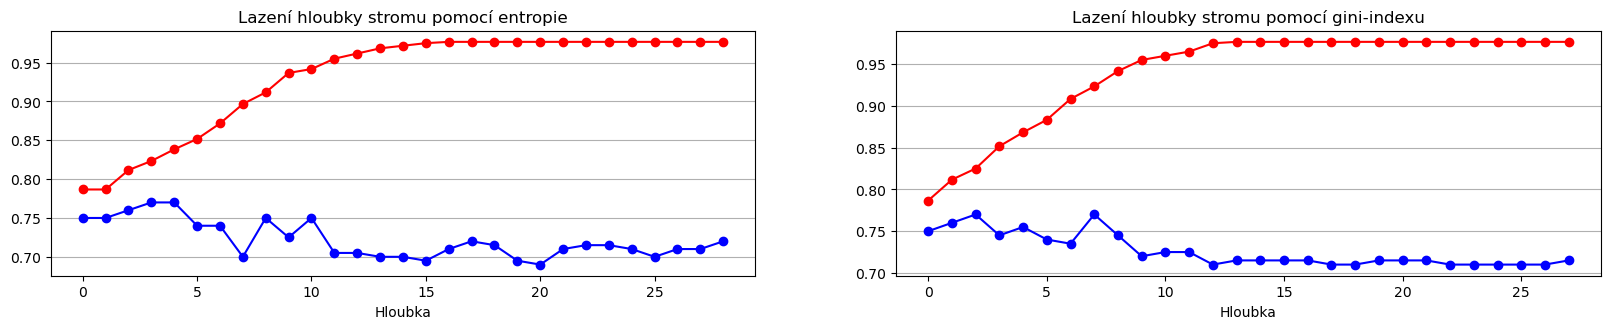

In [28]:
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Lazení hloubky stromu pomocí entropie")
ax1.plot(train_acc[0:29],'or-') # zobrazení křivky výsledků na trénovací množině
ax1.plot(val_acc[0:29],'ob-') # zobrazení křivky výsledků na validační množině
ax1.grid(axis='y')
ax1.set_xlabel("Hloubka")
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Lazení hloubky stromu pomocí gini-indexu")
ax2.plot(train_acc[30:60],'or-') # zobrazení křivky výsledků na trénovací množině
ax2.plot(val_acc[30:60],'ob-') # zobrazení křivky výsledků na validační množině
ax2.grid(axis='y')
ax2.set_xlabel("Hloubka")

#### Uložení nejlepší kombinace hyperparametrů

In [29]:
best_params = param_comb[np.argmax(val_acc)]
print("Nejlepší kombinace parametrů:", best_params)

Nejlepší kombinace parametrů: {'max_depth': 4, 'criterion': 'entropy'}


### Inicializace stromu

In [30]:
# inicializace s nejlepšími parametry
clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], criterion=best_params['criterion'])
clf.fit(Xtrain, Ytrain) # natrénování modelu

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Určit přesnost na trénovací množině

In [31]:
print('přesnost na trénovací množině: {0:.2f}%'.format(metrics.accuracy_score(Ytrain, clf.predict(Xtrain))*100))

přesnost na trénovací množině: 82.33%


#### Určit přesnost na testovací množině

In [32]:
print('přesnost na testovací množině: {0:.2f}%'.format(metrics.accuracy_score(Ytest, clf.predict(Xtest))*100))

přesnost na testovací množině: 80.00%


### Vizualizace modelu po natrénování

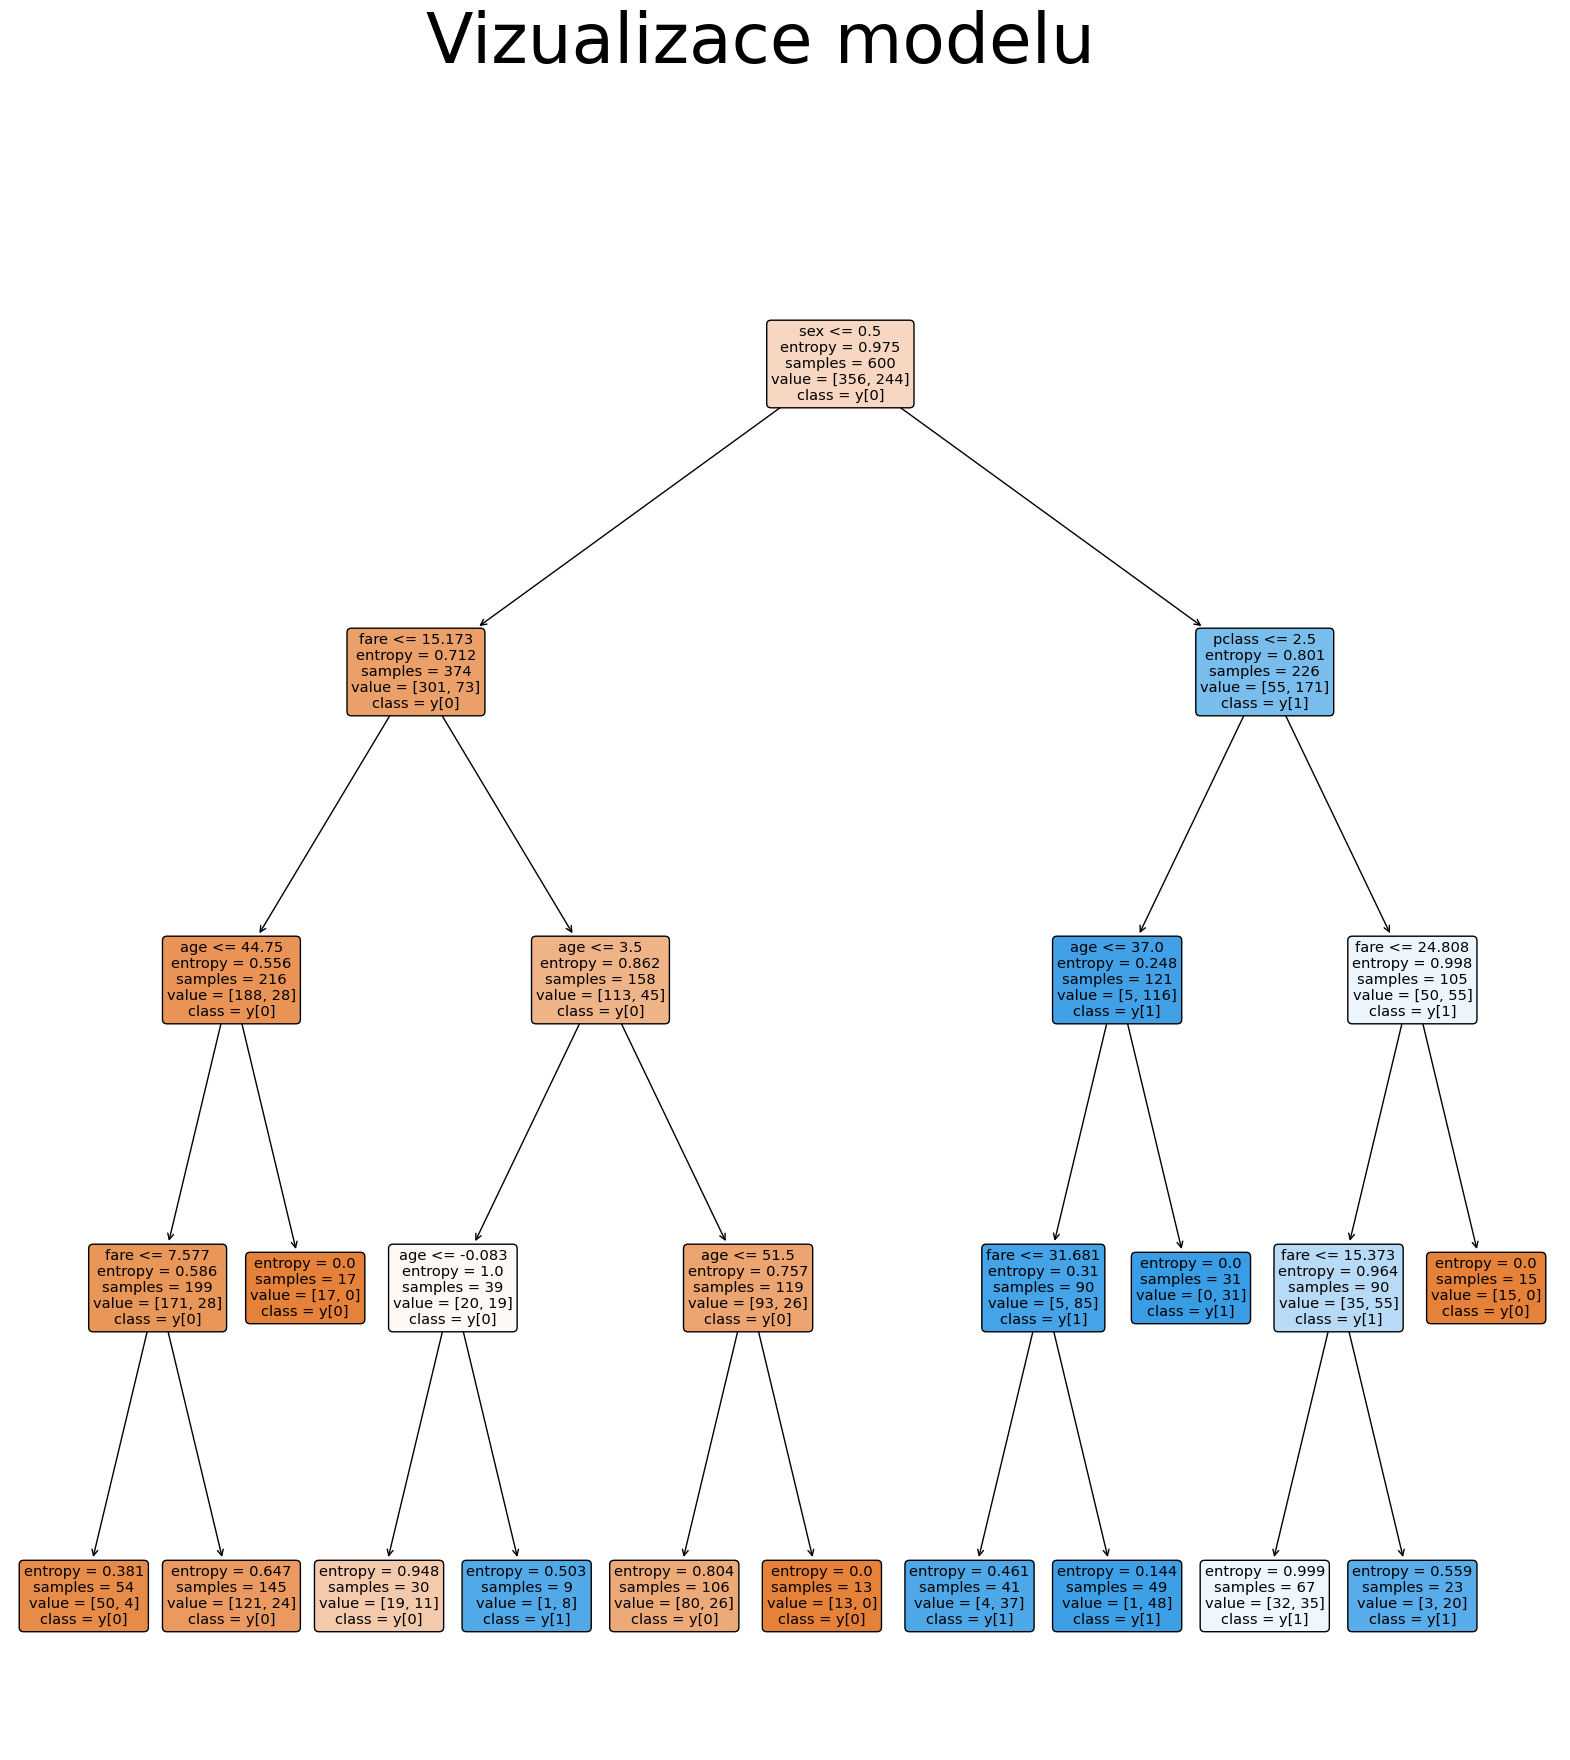

In [33]:
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Vizualizace modelu', fontsize=50)
plot_tree(clf, filled=True, feature_names=Xtrain.iloc[:,:].columns, class_names=True, rounded=True)
plt.show()

## Použití modelu na vyhodnocovacích datech a uložení predikcí

#### Uložení predikce příznaku survived u vyhodnocovaného souboru

In [34]:
predict = clf.predict(eval_data)

#### Vložení výsledku vyhodnocovaného datasetu do souboru

In [35]:
res = pd.DataFrame([x for x in range(0, 309)], columns=["ID"]) # vytvoření sloupce ID
res = res.assign(survived=predict) # přidání sloupce survived do výsledku
res.to_csv('results.csv', index=False) # uložení výsledku do souboru

#### Vizualizace vyhodnocených dat

Text(0.5, 1.0, 'Počty přeživších a nepřeživších ve vyhodnocených datech')

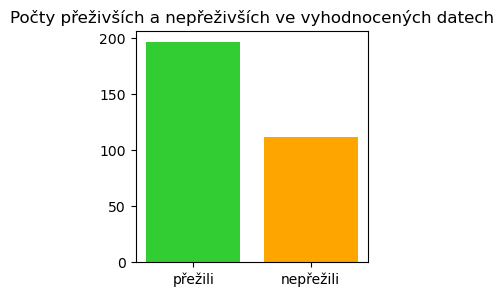

In [36]:
tmp = res["survived"].value_counts()
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(["přežili", "nepřežili"], tmp.values, color=["limegreen", "orange"])
ax.set_title("Počty přeživších a nepřeživších ve vyhodnocených datech")

# Zdroje:
ML1, VIZ, 
https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a4ba0555-59ab-4d47-b412-c7871533220c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>